# Uber users churn prediction

## Project overview 
Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users who signed up in January 2014. The data was pulled several months later

## Dataset description
- city: city this user signed up in (converted to one hot encoding)
- phone: primary mobile device for this user (converted to one hot encoding)
- signup_data: date of account registration; in the form 'YYYYMMDD'
- last_trip_date: the last time this user completed a trip; in the form 'YYYYMMDD'
- avg_dist: the average distance(in miles) per trip taken in the first 30 days after signup
- ave_rating_by_rider: the rider's average rating by the driver over all their trips
- ave_rating_of_rider: the rider's average rating of the driver over all their trips
- surge_pct: the percentage of trips taken with surge multiplier > 1
- ave_surge: The average surge multiplier over all their trips
- trips_in_firts_30_days: the number of trips this user took in the first 30 days after signing ip
- luxury_car_user: True if the user took an luxury car in the first 30 days after signing up; False if not
- weekday_pct: percentage of the trips that are taken during a weekday
- signup_dow: (converted to one hot encoding)

## Introduction to model training
- This is a typical binary class classification problem, and I will try the popular classification algorithms in the market, such as logistic regression, random forest, gradient boosted decison tree, and maybe also SVM and simple neural network.
- We will evaluate the model performance by looking at metrics such as accuracy, auc score and so on. I will also plot the aoc curve and variable importance for tree-based models.
- I also want to have a review of all the popular ml algorithm, like assumptions of the model, pros and cons for training and predicting speed, bias-variance tradeoff and interpretability. We will see which approach is better, including these in this notebook or creating another notebook.

## 1. Load and browse the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/processed_data.csv')

In [3]:
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,phone_iPhone,phone_no_phone,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,1,0,0,0,0,0,0,1,0,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,1,0,1,0,0,0,0,0,0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,1,0,0,0,0,0,1,0,0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0,0,1,0,0,0,0,0,0,1
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,...,1,0,0,0,0,1,0,0,0,0
6,3.95,4.0,4.9,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,...,0,0,0,0,0,0,1,0,0,1
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,...,1,0,0,1,0,0,0,0,0,1
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,...,0,0,0,1,0,0,0,0,0,1
9,2.37,5.0,4.9,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,...,0,0,0,0,0,0,1,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null int64
weekday_pct               50000 non-null float64
signup_dow                50000 non-null int64
city_Astapor              50000 non-null int64
city_King's Landing       50000 non-null int64
city_Winterfell           50000 non-null int64
phone_Android             50000 non-null int64
phone_iPhone              50000 non-null int64
phone_no_phone            500

In [5]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow,city_Astapor,...,phone_iPhone,phone_no_phone,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,0.37708,60.926084,3.309620,0.330680,...,0.691640,0.007920,0.106860,0.102480,0.133760,0.138900,0.195340,0.194400,0.128260,0.623920
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,0.48466,37.081503,1.880666,0.470463,...,0.461821,0.088642,0.308938,0.303282,0.340398,0.345846,0.396466,0.395742,0.334382,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,4.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,5.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
selected_features = list(df.columns)
selected_features

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'last_trip_date',
 'phone',
 'signup_date',
 'surge_pct',
 'trips_in_first_30_days',
 'luxury_car_user',
 'weekday_pct',
 'signup_dow',
 'city_Astapor',
 "city_King's Landing",
 'city_Winterfell',
 'phone_Android',
 'phone_iPhone',
 'phone_no_phone',
 'signup_dow_0',
 'signup_dow_1',
 'signup_dow_2',
 'signup_dow_3',
 'signup_dow_4',
 'signup_dow_5',
 'signup_dow_6',
 'churn']

In [7]:
remove_features = ['city', 'phone', 'signup_date', 'last_trip_date', 'churn']
for f in remove_features:
    selected_features.remove(f)
selected_features

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'trips_in_first_30_days',
 'luxury_car_user',
 'weekday_pct',
 'signup_dow',
 'city_Astapor',
 "city_King's Landing",
 'city_Winterfell',
 'phone_Android',
 'phone_iPhone',
 'phone_no_phone',
 'signup_dow_0',
 'signup_dow_1',
 'signup_dow_2',
 'signup_dow_3',
 'signup_dow_4',
 'signup_dow_5',
 'signup_dow_6']

In [8]:
X = df[selected_features].values
y = df['churn'].values

In [9]:
print(X.shape)
print(y.shape)

(50000, 22)
(50000,)


## 2. Train the model using different ML algorithms

First let's split the data to train and test sets with ration 80:20.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.1 Logistic regression

important parameters:
- C: inverse of the regulization strength, float
- penalty: what kind of regularization, 'l1' or 'l2'

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, penalty='l2')

In [12]:
# Fit a LR model on the training data
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

In [14]:
# Make prediction on the test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

#### Looking at the coefficients of the LR model

In [15]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=True)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
10,city_King's Landing,-1.034840
6,luxury_car_user,-0.865198
13,phone_iPhone,-0.626968
15,signup_dow_0,-0.123405
5,trips_in_first_30_days,-0.117701
17,signup_dow_2,-0.083573
14,phone_no_phone,-0.042273
16,signup_dow_1,-0.041501
8,signup_dow,-0.026648
21,signup_dow_6,-0.006826


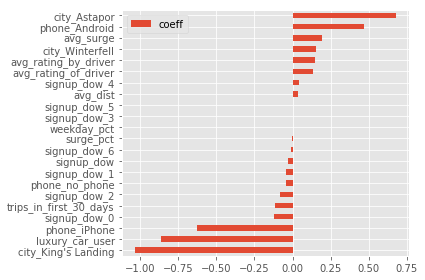

In [16]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.tight_layout()
plt.show()

#### Evaluate the model using metrics such as AUC score, precison, recall

In [17]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [18]:
# A method to print the metric scores
def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    metric_names = ['AUC', 'Accuracy', 'Precision', 'Recall', 'f1_score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                           accuracy_score(y_train, p_train_pred>threshold),
                           precision_score(y_train, p_train_pred>threshold),
                           recall_score(y_train, p_train_pred>threshold),
                           f1_score(y_train, p_train_pred>threshold)
                           ]
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                         accuracy_score(y_test, p_test_pred>threshold),
                         precision_score(y_test, p_test_pred>threshold),
                         recall_score(y_test, p_test_pred>threshold),
                         f1_score(y_test, p_test_pred>threshold)
                         ]
    
    all_metrics = pd.DataFrame({'metrics':metric_names,
                               'train': metric_values_train,
                               'test': metric_values_test}).set_index('metrics')
    print(all_metrics)

In [19]:
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5)

              train      test
metrics                      
AUC        0.760878  0.764357
Accuracy   0.717675  0.722000
Precision  0.736112  0.739412
Recall     0.853117  0.857463
f1_score   0.790307  0.794074


#### Plot the aoc curve

In [20]:
roc_auc_score(y_train, p_train_pred)

0.760878207047201

In [21]:
from sklearn.metrics import roc_curve

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green', lw=lw, 
            label = 'ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=lw,
            label = 'ROC Test (AUC = %0.4f)' % roc_auc_test, linestyle='--')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('The AOC curve')
    plt.legend(loc='lower right')
    plt.show()

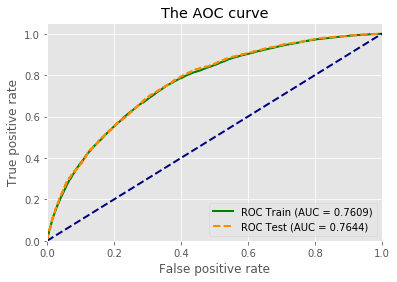

In [22]:
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### 2.2 Decision tree and bagging

Important parameters
- max_depth: maximum depth of the tree
- num_samples_leaf: minumum number of observations in a leaf

In [39]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

In [41]:
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

              train      test
metrics                      
AUC        0.916974  0.807248
Accuracy   0.831525  0.752600
Precision  0.855530  0.795771
Recall     0.878132  0.812830
f1_score   0.866684  0.804210


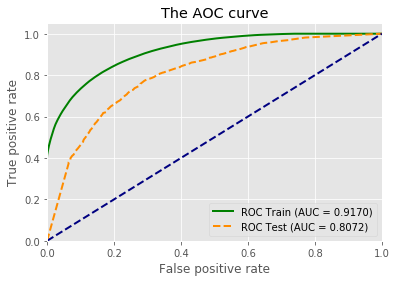

In [42]:
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

Define a function to do the training, printing the metrics and ploting the roc vurce

In [43]:
def train_print_plot(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]
    
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]
    
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [44]:
# We can also plot the variables for the tree-based models accoring to their importances:

def plot_imp_tree(clf, selected_features):
    
    importances = clf.feature_importances_
    df_imp = pd.DataFrame({'feature': selected_features,
                           'importance': importances
                          }).sort_values(by=['importance'], ascending=True).set_index('feature')
    df_imp.plot.barh()
    plt.title('Importances of the variables')
    plt.show()

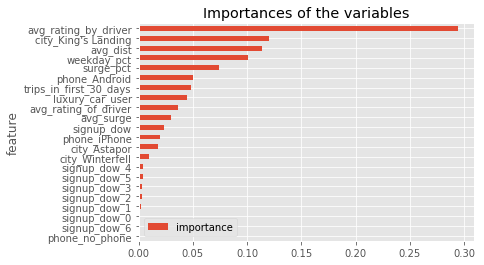

In [45]:
plot_imp_tree(clf, selected_features)

Bagging
- Use bootstrap sampling to produce many samples, train a DT for each sample and use the majority voting as the final output

              train      test
metrics                      
AUC        0.923328  0.851858
Accuracy   0.839825  0.783500
Precision  0.848563  0.802577
Recall     0.904590  0.866901
f1_score   0.875682  0.833500


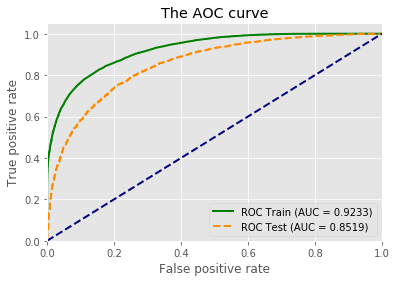

In [38]:
from sklearn.ensemble import BaggingClassifier

base_clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)

parameters = {'base_estimator': base_clf,
              'n_estimators': 50,
              'n_jobs': -1
             }

clf = BaggingClassifier(**parameters)

train_print_plot(clf, X_train, y_train, X_test, y_test)

### 2.3 Random forest

Also a bagging method, but only use a subset of all the features for each splitting in order to decorrelate the trees.

Important parameters
- n_estimators: number of trees
- max_features: number of features used when splitting
- criterion: splitting criterion
- max_depth:
- min_samples_split:
- min_samples_leaf:
- random_state:
- n_jobs: '-1' means using all processors

              train      test
metrics                      
AUC        0.896267  0.853961
Accuracy   0.814450  0.782600
Precision  0.823864  0.797896
Recall     0.893486  0.873460
f1_score   0.857264  0.833970


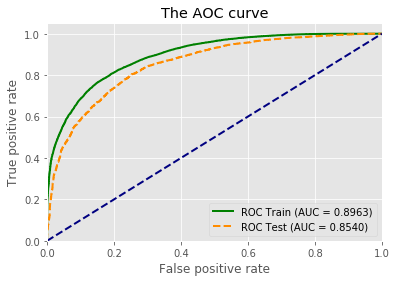

In [32]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 10,
              'random_state': 0,
              'n_jobs': -1}

clf = RandomForestClassifier(**parameters)

train_print_plot(clf, X_train, y_train, X_test, y_test)

In [ ]:
plot_imp_tree(clf, selected_features)

### 2.4 Gradeint boosting decison tree

The idea is to start with a weak learner, and train more trees iteratively to learn the information that is not captured by previous trees, and combine these trees together.

              train      test
metrics                      
AUC        0.874274  0.862712
Accuracy   0.802925  0.793400
Precision  0.821925  0.812453
Recall     0.873161  0.870421
f1_score   0.846768  0.840439


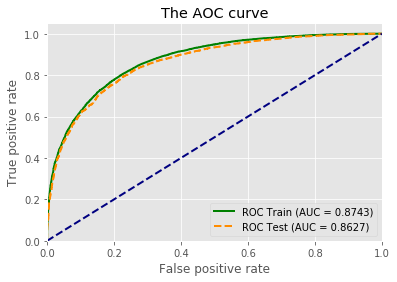

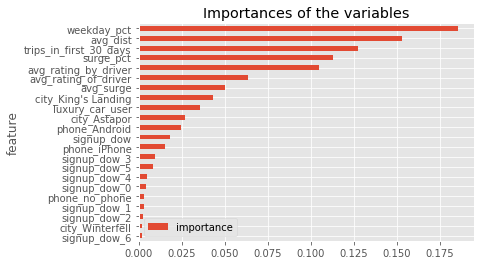

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'n_estimators': 50,
              'max_depth': 5,
              'learning_rate': 0.2,
              'min_samples_split': 2
             }

clf = GradientBoostingClassifier(**parameters)

train_print_plot(clf, X_train, y_train, X_test, y_test)
plot_imp_tree(clf, selected_features)

### 2.5 KNN and bagged KNN

              train      test
metrics                      
AUC        0.893256  0.778767
Accuracy   0.812300  0.738700
Precision  0.832450  0.775356
Recall     0.875165  0.819389
f1_score   0.853273  0.796764


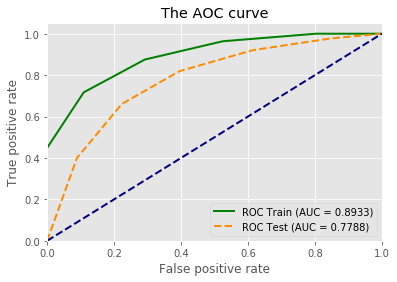

In [51]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': 5,
              'leaf_size': 10
             }

base_clf = KNeighborsClassifier(**parameters)

train_print_plot(base_clf, X_train, y_train, X_test, y_test)

              train      test
metrics                      
AUC        0.911457  0.794243
Accuracy   0.821525  0.744000
Precision  0.839446  0.779494
Recall     0.882622  0.823388
f1_score   0.860493  0.800840


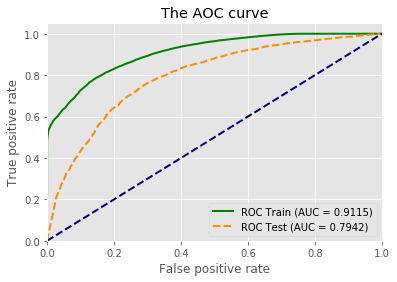

In [53]:
parameters = {'base_estimator': base_clf,
              'n_estimators': 50,
              'n_jobs': -1
             }

clf = BaggingClassifier(**parameters)

train_print_plot(clf, X_train, y_train, X_test, y_test)